# Explore here

In [29]:
# Predecir el coste del seguro médico de una persona
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
total_data.shape

(1338, 7)

In [31]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()

(1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


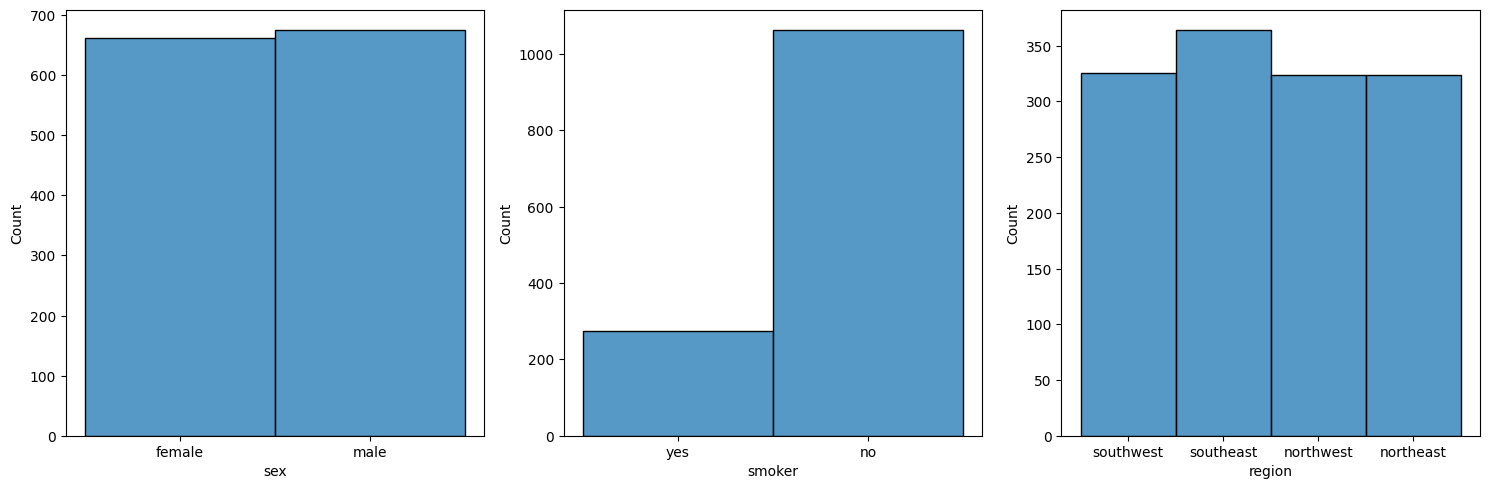

In [33]:
# 3. Análisis de variables univariante

#   Variables categóricas -> histogramas
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.histplot(ax = axis[0], data = total_data, x = "sex")
sns.histplot(ax = axis[1], data = total_data, x = "smoker")
sns.histplot(ax = axis[2], data = total_data, x = "region")

plt.tight_layout()

# Mostrar el plot
plt.show()

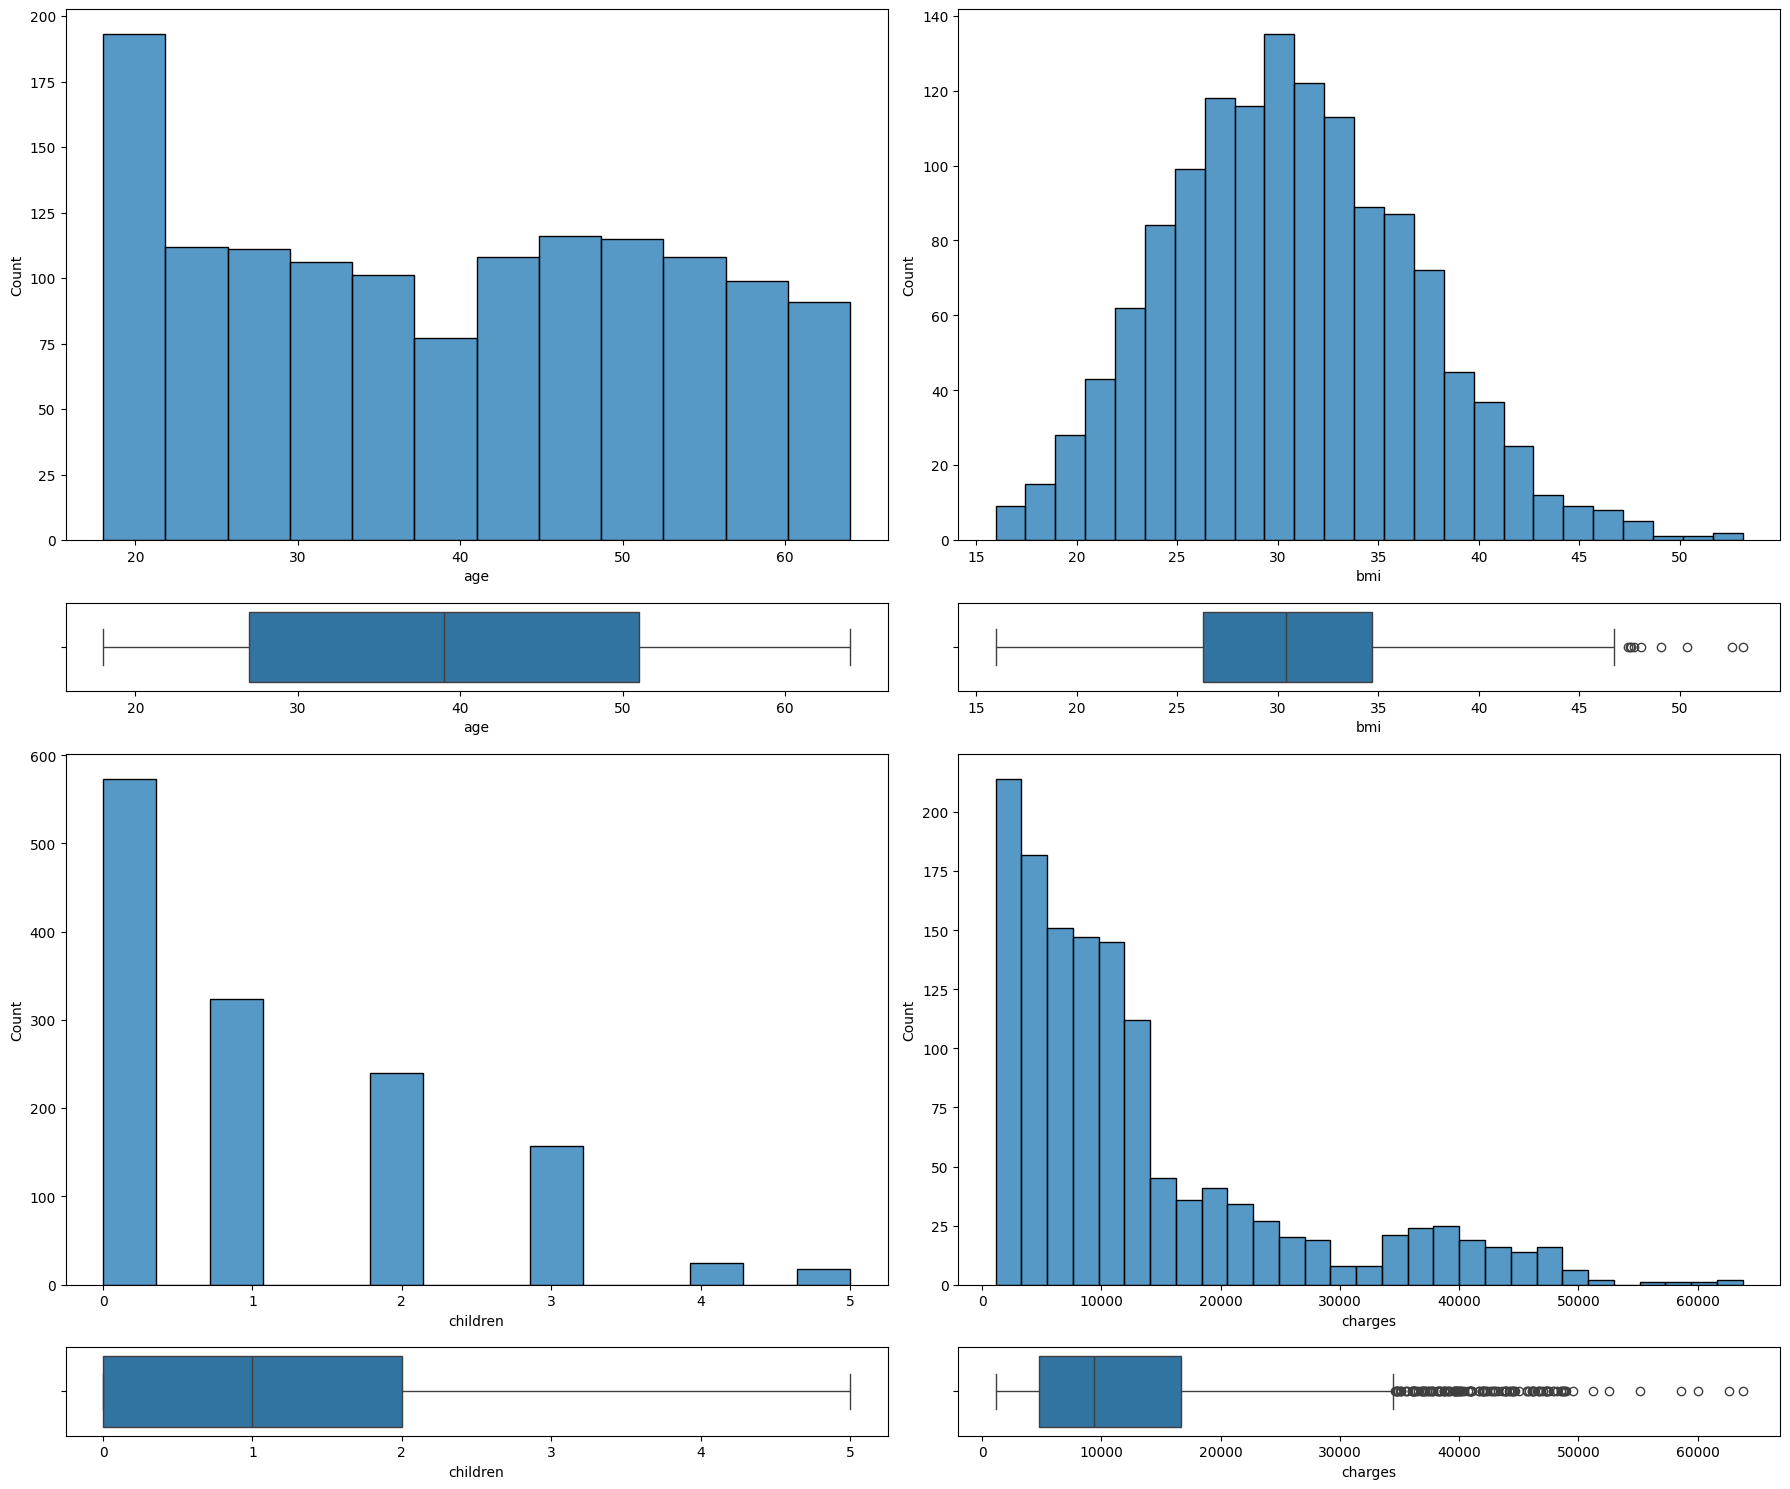

In [34]:
# Variables numéricas
fig, axis = plt.subplots(4, 2, figsize = (18, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "age") 
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")
sns.histplot(ax = axis[0, 1], data = total_data, x = "bmi") 
sns.boxplot(ax = axis[1, 1], data = total_data, x = "bmi")
sns.histplot(ax = axis[2, 0], data = total_data, x = "children") 
sns.boxplot(ax = axis[3, 0], data = total_data, x = "children")
sns.histplot(ax = axis[2, 1], data = total_data, x = "charges") 
sns.boxplot(ax = axis[3, 1], data = total_data, x = "charges")

plt.tight_layout()

plt.show()

<Axes: >

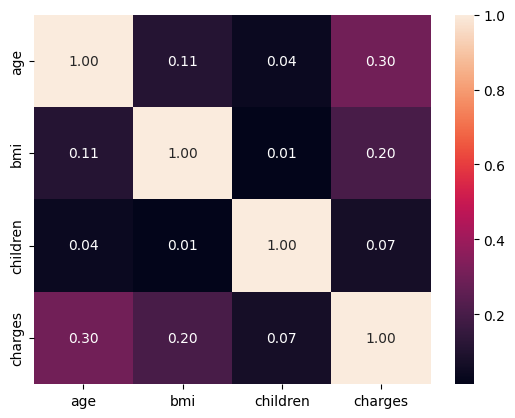

In [35]:
#   Análisis de correlaciones numericas

sns.heatmap(total_data[["age", "bmi", "children", "charges"]].corr(), annot = True, fmt = ".2f")

<Axes: >

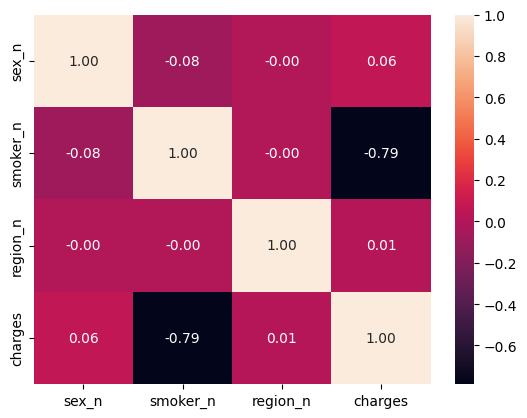

In [36]:
total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data["region_n"] = pd.factorize(total_data["region"])[0]

sns.heatmap(total_data[["sex_n", "smoker_n", "region_n", "charges"]].corr(), annot = True, fmt = ".2f")

In [37]:
# Variables predictoras elegidas -> age y smoker

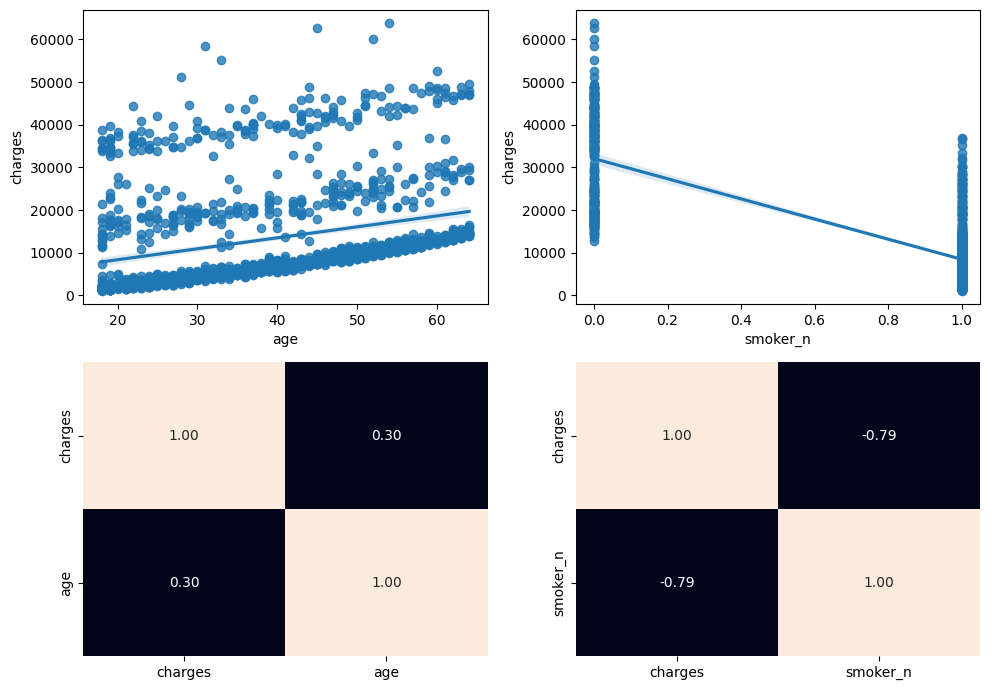

In [38]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "smoker_n", y = "charges")
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

plt.tight_layout()

plt.show()

In [39]:
total_data.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


In [40]:
total_data.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

In [49]:
#   Escalado de valores
# División del conjunto en train y test
from sklearn.model_selection import train_test_split

# El precio se ha deducido que sólo guarda relación con el tipo de habitación y más débilmente con el barrio
num_variables = ["age", "smoker_n", "bmi"]

# Dividimos el conjunto de datos en muestras de train y test
X = total_data.drop("charges", axis = 1)[num_variables]
y = total_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,smoker_n,bmi
1114,23,1,24.510
968,21,1,25.745
599,52,1,37.525
170,63,1,41.470
275,47,1,26.600


In [42]:
y_train.head()

1114     2396.09590
968      3279.86855
599     33471.97189
170     13405.39030
275      9715.84100
Name: charges, dtype: float64

In [43]:
'''from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()'''

'from sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nscaler.fit(X_train)\n\nX_train_norm = scaler.transform(X_train)\nX_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)\n\nX_test_norm = scaler.transform(X_test)\nX_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)\n\nX_train_norm.head()'

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,age,smoker_n,bmi
1114,0.108696,1.0,0.230024
968,0.065217,1.0,0.263250
599,0.739130,1.0,0.580172
170,0.978261,1.0,0.686306
275,0.630435,1.0,0.286252


In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scal, y_train)

LinearRegression()

In [52]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 21701.793912570167
Coeficientes (b): [ 11586.30415359 -23074.26173498  11329.51105637]


In [53]:
y_pred = model.predict(X_test_scal)
y_pred

array([ 8433.67443577,  4336.46678013, 13165.0382606 , 30593.69534864,
        8738.64384303, 13004.1887831 , 29273.63576136,  2177.09021482,
       10922.95093736, 10315.83022735, 11021.84491859, 33740.33309282,
       30613.92158231, 18004.87150727,  9656.23179762,  9311.37354392,
        4325.12010919, 32099.96630635,  3001.71338943,  5552.62898392,
        4325.12010919, 29913.00795743, 14580.01800456, 30752.45719245,
       31444.92261851,  4769.02189756, 35187.05259131, 37413.46842278,
       10952.8675722 , 12177.75978526,  6505.9651105 , 13121.95183512,
         870.87899962, 12471.87695664, 40355.37672202, 12499.04467281,
        2732.11267963,  2866.20850841, 32023.18474965,  9365.1280589 ,
        6903.0538664 , 29243.81679061, 34097.79751626, 11919.91981386,
        6896.22734444,  4145.55111435,  6040.33037213,  9173.38425823,
        4186.69945959,  8909.59778913,  6340.1295272 , 12053.6361681 ,
       30836.41015271,  4425.70495311, 10719.84316929,  9666.05445578,
      

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 35841574.81814756
Coeficiente de determinación: 0.804950247464317
